**DeapSECURE module 4: Deap Learning**

## Post Analysis for NN_Model_1H.py (scanning over number of hidden neurons, learning rate, batch sizes, and number of hidden layers one at a time)

This is a Jupyter notebook for the hands-on learning activities of the
["Deep Learning" (DL) module](https://deapsecure.gitlab.io/deapsecure-lesson04-nn/),
Episode 8: ["Post-Analysis for Modeling Tuning Experiments"](https://deapsecure.gitlab.io/deapsecure-lesson04-nn/32-analysis-tuning/index.html).

Please visit the [DeapSECURE](https://deapsecure.gitlab.io/) website to learn more about our training program.

## Overview

### Introduction
Post-analysis follows the post-processing phase and focuses on analyzing the model’s results to better understand the behavior of a model and improve its performance

In this session, we will learn how to do post-analysis on the models created from episode 6 and episode 7.
In these experiment, we only varied one hyperparameter at a time.

### Goals
The first goal of the post-analysis for model tuning is to discover the combination of hyperparameters that will produce the best accuracy.
The secondary goal is to determine how increasing or decreasing one hyperparameter will affect the accuracy of the model.

Note: This notebook also creates different visualizations for the two model tuning lessons, since the number of epochs is different.
Since episode 7 includes more experiments and does 30 epochs, the first part of this notebook will focus on just that episode's outputs.

To accomplish these goals, we will:

1) Import the post-processing CSV file that contains the model's output/metrics (`loss`, `accuracy`, `val_loss`, and `val_accuracy`) and metadata.

2) Create visualizations of the models' metrics. This will be the last epoch metric (accuracy and/or loss) vs. the varying hyperparameter.

3) Draw conclusions based on the visualizations. This will be accomplished by answering the provided questions.

#### Reminder

* Throughout this notebook, `#TODO` is used as a placeholder where you need to fill in with something appropriate. 

* In the solutions version of this notebook, `#RUNIT` cells are cells that should not be provided to the user during their first pass of the notebook.
These include cells with answers to the given questions.

* To run a code in a cell, press `Shift+Enter`.

* <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf" target="_blank">Pandas cheatsheet</a>

* <a href="https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html#summary-indexing-syntax" target="_blank">Summary table of the commonly used indexing (subscripting) syntax</a> from our own lesson.

We recommend you open these on separate tabs or print them;
they are handy help for writing your own codes.

### Step 0: Import Modules

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Hidden Neurons Post-Analysis

Recall the following about the number of hidden neurons (in the hidden layer):

 - The number of hidden neurons determines the width of the layer.
 
 - More neurons increases the complexity of the model. And fewer neurons decrease the complexity of the model.


#### Step 1: Reading in the CSV File:

In [75]:
path = 'post_processing_hpc_neurons.csv' # path to episode 7's post-processing CSV file 
# path = 'post_processing_hpc_neurons_ext.csv' # path to load_bulk_final_metrics CSV file from episode 7
# path = '../model_tuning/post_processing_neurons.csv' # path to CSV file from episode 6


df_HN = pd.read_csv(path, index_col=0) # read in the csv file and ignore the additional numbered column

print(df_HN) # print this DataFrame

## Further analysis:
## You can also do things, such as sorting (by one of the result columns, such as loss)
print("\nSorted by val_accuracy:")
print(df_HN.sort_values(['val_accuracy'], ascending=False))

# This is redundant for the post-processing CSV file used in episode 7.
# However, if you utilize the more advanced CSV file creation, you need this.
# This groups the rows by the hidden neurons value.
# Since this will be unique for each model, we can
# take the last value, which will be the last epoch.
df_HN =  df_HN.groupby('hidden_neurons').tail(1)

                    loss  accuracy  val_loss  val_accuracy
hidden_neurons                                            
1               1.945121  0.319691  1.947505      0.320510
2               1.051278  0.682108  1.061323      0.682804
4               0.463814  0.907489  0.460035      0.910356
8               0.183243  0.952651  0.183629      0.950912
12              0.070112  0.985663  0.068991      0.985389
18              0.045203  0.990570  0.043723      0.990589
40              0.016035  0.996434  0.017410      0.996375
80              0.007796  0.998654  0.011362      0.998425
256             0.003840  0.999515  0.007077      0.999194
512             0.002919  0.999606  0.009277      0.999249
1024            0.003308  0.999593  0.006825      0.999231

Sorted by val_accuracy:
                    loss  accuracy  val_loss  val_accuracy
hidden_neurons                                            
512             0.002919  0.999606  0.009277      0.999249
1024            0.003308  0.999

#### Step 2: Creating the Visualizations:

First, we will create a subplot of a line graph, where the subplots are as follows (clock-wise):

 1) Training loss vs. number of hidden neurons
 
 2) Training accuracy vs. number of hidden neurons
 
 3) Validation loss vs. number of hidden neurons
 
 4) Validation accuracy vs. number of hidden neurons

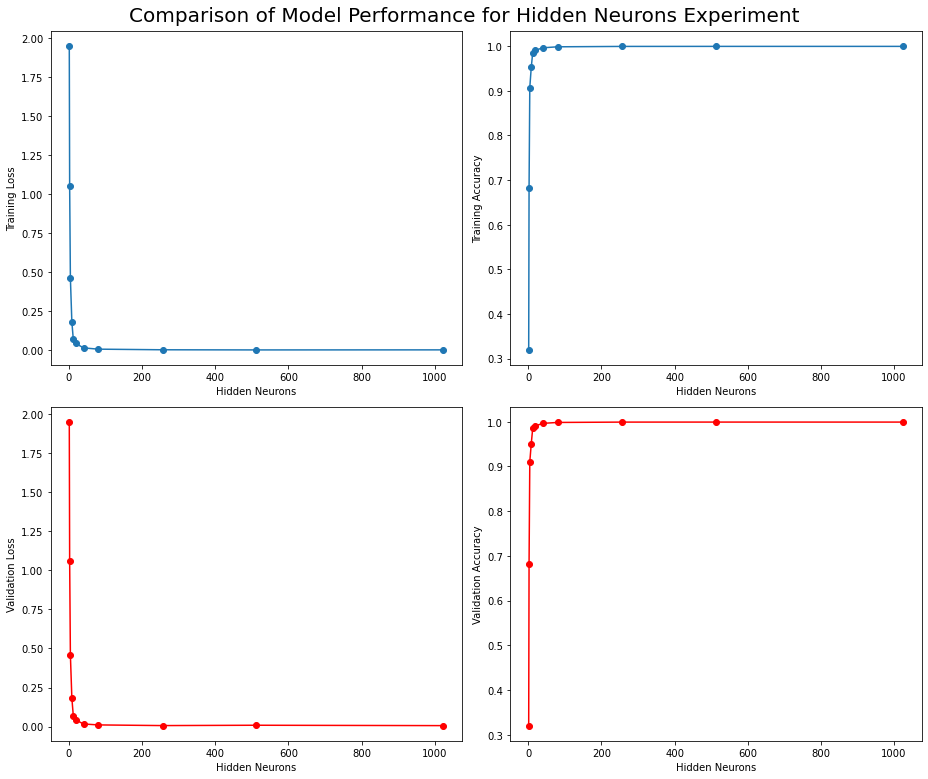

In [48]:
# The following is to accommodate for either type of post-processing CSV file
# The basic type, where the hyperparameter name is the index's name

if "neuron" in df_HN.index.name:
    xData_HN = df_HN.index
else:
    # if the hidden_neurons are input as a list
    if "[" in str(df_HN['hidden_neurons'][0]):
        # temporarily remove the "[]" and make it into an integer
        df_HN['hidden_neurons'] = df_HN['hidden_neurons'] \
        .str.replace('[^0-9]', '', regex=True).astype('int32')        
    # the x-axis data will be the hidden neurons
    xData_HN = df_HN['hidden_neurons']    

# Initalize the subplots
fig, axs = plt.subplots(2, 2, figsize=(13, 11))

# plot loss vs. number of neurons
axs[0, 0].plot(xData_HN, df_HN['loss'], marker='o') 
axs[0, 0].set_xlabel("Hidden Neurons")
axs[0, 0].set_ylabel("Training Loss")

# plot the validation loss vs. number of neurons
axs[1, 0].plot(xData_HN, df_HN['val_loss'], marker='o', color='red') 
axs[1, 0].set_xlabel("Hidden Neurons")
axs[1, 0].set_ylabel("Validation Loss")

# plot the accuracy vs. number of neurons
axs[0, 1].plot(xData_HN, df_HN['accuracy'], marker='o')
axs[0, 1].set_xlabel("Hidden Neurons")
axs[0, 1].set_ylabel("Training Accuracy")

# plot the validation accuracy vs. number of neurons
axs[1, 1].plot(xData_HN, df_HN['val_accuracy'], marker='o', color='red')
axs[1, 1].set_xlabel("Hidden Neurons")
axs[1, 1].set_ylabel("Validation Accuracy")

# title
fig.suptitle("Comparison of Model Performance for Hidden Neurons Experiment", fontsize=20)

# add spaces on the graph
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.175) # create space between the plots

# additional formating
plt.tight_layout()

# save the figure
plt.savefig("Post_Analysis_Hidden_Neurons_Experiment.png")

#### Create a bar chart (another way of displaying the results)

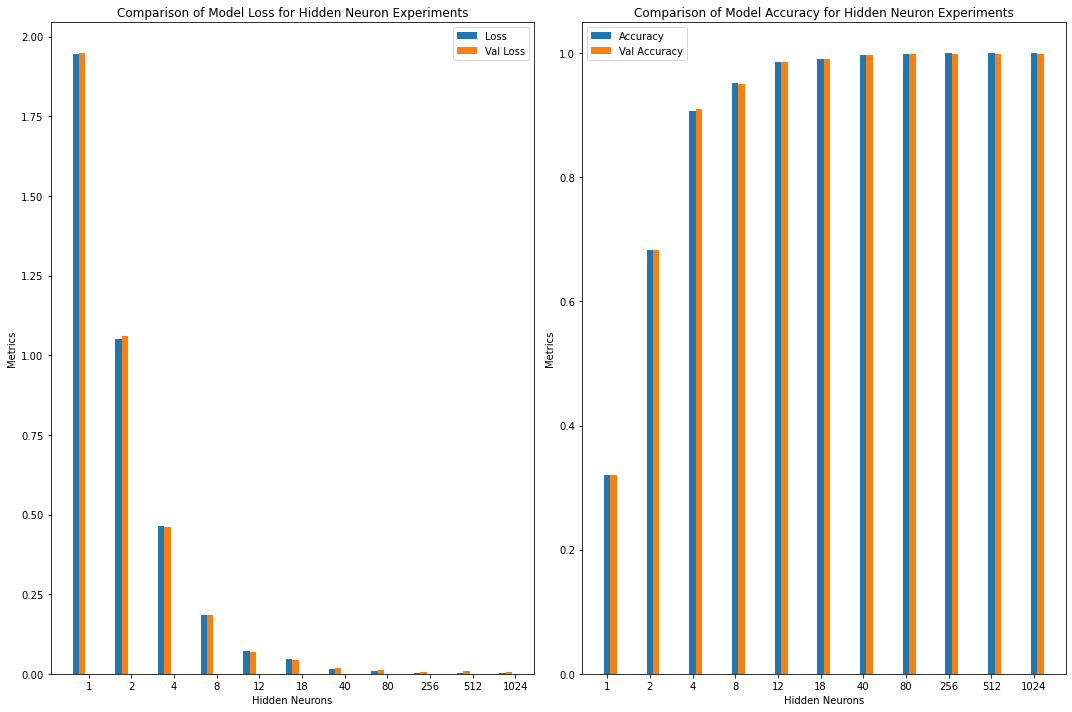

In [49]:
# Set the width and height of the bar chart
bar_width = 0.15
bar_positions = range(len(df_HN))

# Initalize the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# create the loss and val_loss bar graph
ax[0].bar([pos - 2*bar_width for pos in bar_positions], df_HN['loss'], \
          width=bar_width, label='Loss')
ax[0].bar([pos - bar_width for pos in bar_positions], df_HN['val_loss'], \
          width=bar_width, label='Val Loss')
# Set x-axis ticks and labels
ax[0].set_xticks(bar_positions)
ax[0].set_xticklabels(xData_HN)
# Add legend
ax[0].legend()
# Set title and labels
ax[0].set_title('Comparison of Model Loss for Hidden Neuron Experiments')
ax[0].set_xlabel('Hidden Neurons')
ax[0].set_ylabel('Metrics')


# Create the accuracy and val_accuracy bar graph
ax1 = ax[1]
ax1.bar(bar_positions, df_HN['accuracy'], width=bar_width, label='Accuracy')
ax1.bar([pos + bar_width for pos in bar_positions], df_HN['val_accuracy'], \
        width=bar_width, label='Val Accuracy')

# Set x-axis ticks and labels
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(xData_HN)
# Add legend
ax1.legend()
# Set title and labels
ax1.set_title('Comparison of Model Accuracy for Hidden Neuron Experiments')
ax1.set_xlabel('Hidden Neurons')
ax1.set_ylabel('Metrics')

# Additional formating
plt.tight_layout()

# Save the figure
plt.savefig("Post_Analysis_Hidden_Neurons_Experiment_Bar_Graph.png")

### Importance of filtering

From the graphics above, we can see the general trend of how the increasing or decreasing of the number of hidden neurons (in the hidden layer) affects the accuracy. However, we cannot see very well the trends with models whose number of hidden neurons is above 18.

## Post Analysis: Hidden Neurons Questions

1. What happened to the model’s accuracy when we reduced the hidden_neurons hyperparameter? Describe the change in the accuracy as the hidden_neurons hyperparameter is reduced to an extremely small number.


#TODO

2.	What happened to the accuracy as we increased the hyperparameter?

#TODO

3.	In conclusion, to improve the accuracy of the model, should we use more or less hidden neurons?

#TODO


#### Other points to make about the post analysis of the hidden neurons
- Point of diminishing return: where improving the model does not yield a significant enough benefit to the model’s accuracy

- Can we find this point? 
Modify the post-analysis notebook to only show ≥ 18 hidden neurons
Improvements to the model’s accuracy does not significantly increase after 80 neurons


## Hidden Neurons >= 18 Post-Analysis

In [50]:
# filter the df_hn DataFrame where the index (column) values are greater than
# or equal to 18
if "neuron" in df_HN.index.name:
    # Since the index is the number of hidden neurons, we can filter the index by 
    # values >= 18 
    df_HN_gr_18 = df_HN[df_hn.index >= 18] 
    # xData will be x-axis data
    xData_HN = df_HN_gr_18.index
    print("Filtered DataFrame of hidden neurons >= 18")
    print(df_HN_gr_18)
    
else:
    # if the hidden_neurons are input as a list
    if "[" in str(df_HN['hidden_neurons'][0]):
        # temporarily remove the "[]" and make it into an integer
        df_HN['hidden_neurons'] = df_HN['hidden_neurons'] \
        .str.replace('[^0-9]', '', regex=True).astype('int32')
    # Filter the 'hidden_neurons' column for values that are >= 18
    df_HN_gr_18 = df_HN[df_hn['hidden_neurons'] >= 18]
    xData_HN = df_HN_gr_18['hidden_neurons'] 
    print("Filtered DataFrame of hidden neurons >= 18")
    print(df_HN_gr_18)

Filtered DataFrame of hidden neurons >= 18
                    loss  accuracy  val_loss  val_accuracy
hidden_neurons                                            
18              0.045203  0.990570  0.043723      0.990589
40              0.016035  0.996434  0.017410      0.996375
80              0.007796  0.998654  0.011362      0.998425
256             0.003840  0.999515  0.007077      0.999194
512             0.002919  0.999606  0.009277      0.999249
1024            0.003308  0.999593  0.006825      0.999231


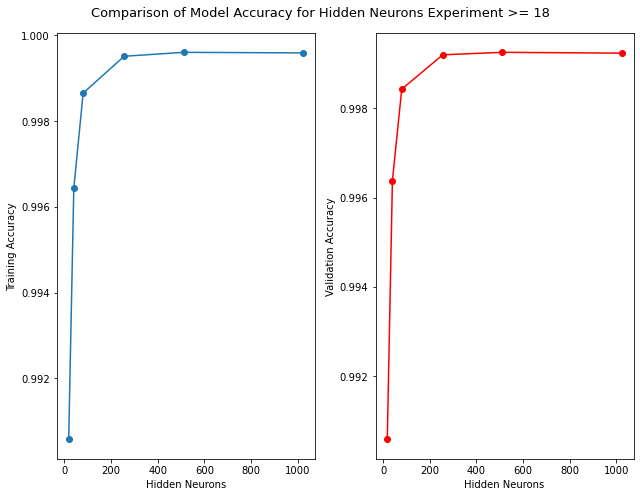

In [52]:
# Create the visualization!

# Initalize the subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
# plot the accuracy vs. number of neurons
axs[0].plot(xData_HN, df_HN_gr_18['accuracy'], marker='o')
axs[0].set_xlabel("Hidden Neurons")
axs[0].set_ylabel("Training Accuracy")

# plot the validation accuracy vs. number of neurons
axs[1].plot(xData_HN, df_HN_gr_18['val_accuracy'], marker='o', color='red')
axs[1].set_xlabel("Hidden Neurons")
axs[1].set_ylabel("Validation Accuracy")

fig.suptitle("Comparison of Model Accuracy for Hidden Neurons Experiment >= 18", fontsize=13)

# add spaces on the graph
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2) # create space between the plots

plt.tight_layout()
plt.savefig("Post_Analysis_Hidden_Neurons_Experiment_Gr18.png")
plt.show()

## Learning Rate Post-Analysis

Recall the following about learning rate (step-size):

 - Affects the amount the model's weights are able to change


#### Step 1: Reading in the CSV File:

In [76]:
path = 'post_processing_hpc_lr.csv' # path to episode 7's post-processing CSV file 
# path = 'post_processing_hpc_lr_ext.csv' # path to load_bulk_final_metrics CSV file from episode 7
# path = '../model_tuning/post_processing_lr.csv' # path to CSV file from episode 6

df_LR = pd.read_csv(path, index_col=0) # read in the csv file and ignore the additional numbered column

print(df_LR) # print this DataFrame

## Further analysis:
## You can also do things, such as sorting (by one of the result columns, such as loss)
print("\nSorted by val_accuracy:")
print(df_LR.sort_values(['val_accuracy'], ascending=False))

# This is redundant for the post-processing CSV file used in episode 7.
# However, if you utilize the more advanced CSV file creation, you need this.
# This groups the rows by the learning rate value.
# Since this will be unique for each model, we can
# take the last value, which will be the last epoch.
df_LR =  df_LR.groupby('learning_rate').tail(1)

                   loss  accuracy  val_loss  val_accuracy
learning_rate                                            
0.0003         0.045203  0.990570  0.043723      0.990589
0.0010         0.018579  0.995926  0.021447      0.995862
0.0100         0.021298  0.995395  0.024532      0.995386
0.1000         0.444514  0.921821  0.340468      0.921012

Sorted by val_accuracy:
                   loss  accuracy  val_loss  val_accuracy
learning_rate                                            
0.0010         0.018579  0.995926  0.021447      0.995862
0.0100         0.021298  0.995395  0.024532      0.995386
0.0003         0.045203  0.990570  0.043723      0.990589
0.1000         0.444514  0.921821  0.340468      0.921012


#### Step 2: Creating the Visualizations:

First, we will create a subplot of a line graph, where the subplots are as follows (clock-wise):

 1) Training loss vs. learning rate

 2) Training accuracy vs. learning rate

 3) Validation loss vs. learning rate

 4) Validation accuracy vs. learning rate

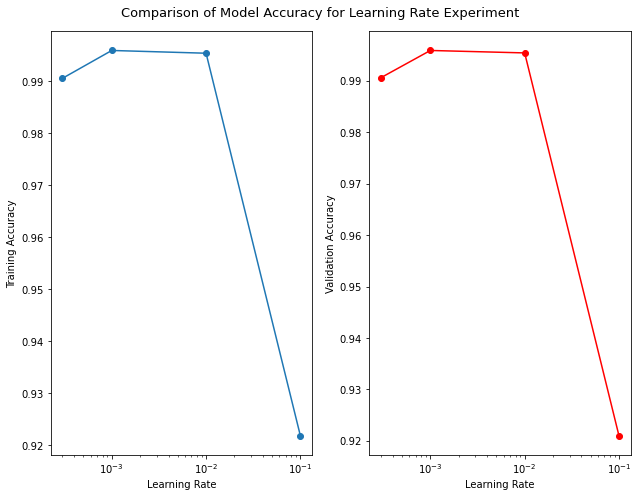

In [62]:
# The following is to accommodate for either type of post-processing CSV file
# The basic type, where the hyperparameter name is the index's name

if "learning_rate" in df_LR.index.name:
    xData_LR = df_LR.index
else:
    # the x-axis data will be the learning rate
    xData_LR = df_LR['learning_rate']    

typeOfExperiment = "Learning Rate"
# Initalize the subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
# plot the accuracy vs. learning rate
axs[0].plot(xData_LR, df_LR['accuracy'], marker='o')
axs[0].set_xlabel(typeOfExperiment)
axs[0].set_ylabel("Training Accuracy")

# plot the validation accuracy vs. learning rate
axs[1].plot(xData_LR, df_LR['val_accuracy'], marker='o', color='red')
axs[1].set_xlabel(typeOfExperiment)
axs[1].set_ylabel("Validation Accuracy")

# Log scale
for ax in axs:
    ax.set_xscale('log')

fig.suptitle("Comparison of Model Accuracy for " + typeOfExperiment + " Experiment", fontsize=13)

# add spaces on the graph
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2) # create space between the plots

plt.tight_layout()
plt.savefig("Post_Analysis_Learning_Rate_Experiment.png")
plt.show()

#### Create a bar chart (another way of displaying the results)

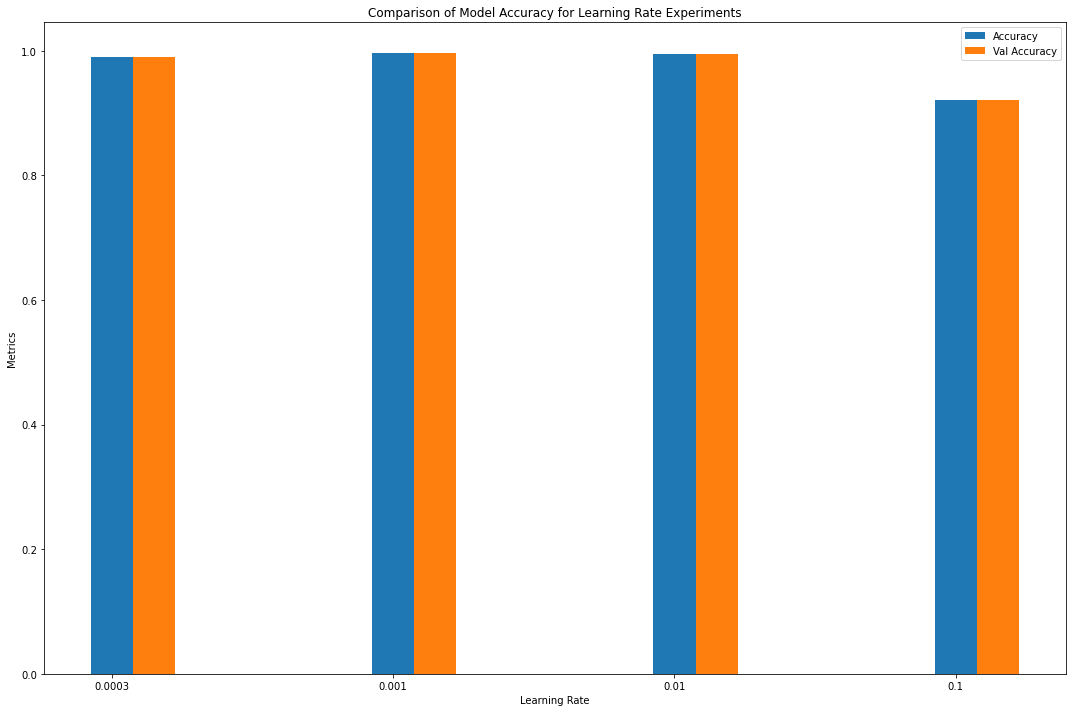

In [55]:
typeOfExperiment = "Learning Rate"

# Set the width and height of the bar chart
bar_width = 0.15
bar_positions = range(len(df_LR))

# Initalize the subplots
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.bar(bar_positions, df_LR['accuracy'], width=bar_width, label='Accuracy')
ax1.bar([pos + bar_width for pos in bar_positions], df_LR['val_accuracy'], width=bar_width, label='Val Accuracy')

# Set x-axis ticks and labels
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(xData_LR)
# Add legend
ax1.legend()
# Set title and labels
ax1.set_title('Comparison of Model Accuracy for ' + typeOfExperiment + ' Experiments')
ax1.set_xlabel(typeOfExperiment)
ax1.set_ylabel('Metrics')

plt.tight_layout()
plt.savefig("Post_Analysis_Learning_Rate_Experiment_Bar_Graph.png")

## Post Analysis: Learning Rate Questions

1. What do you observe when we train the network with a small learning rate?

#TODO

2. What happens to the training process when we increase the learning rate?

#TODO

3. What happens to the training process when we increase the learning rate even further (than 0.1)?

Use the cell below to view the higher learning rate values (that I ran at a different time).


Sorted by val_accuracy:
                   loss  accuracy  val_loss  val_accuracy
learning_rate                                            
0.005          0.017234  0.995697  0.014699      0.997199
0.005          0.016263  0.996045  0.013918      0.997144
0.010          0.020884  0.995574  0.029446      0.996869
0.010          0.030263  0.994667  0.017078      0.996832
0.005          0.015589  0.996150  0.014428      0.996796
...                 ...       ...       ...           ...
0.220          2.738863  0.352841  2.305701      0.359803
0.220          2.345614  0.349092  2.239789      0.358302
0.220          2.361346  0.351802  2.457109      0.357826
0.220          2.414302  0.354805  2.669685      0.355885
0.220          3.065418  0.351747  2.273932      0.296140

[480 rows x 4 columns]


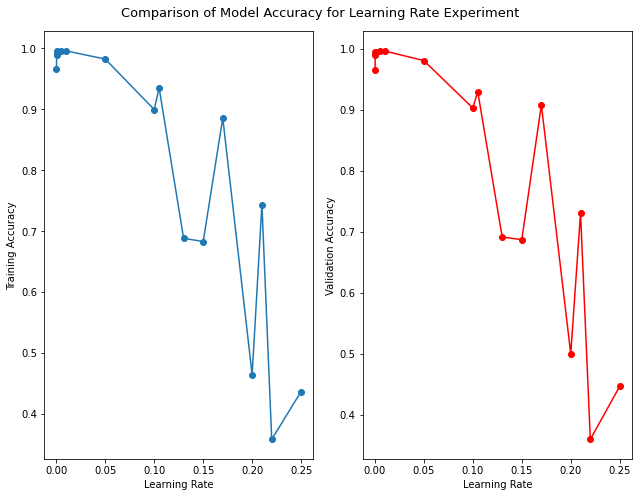

In [91]:
path = 'post_processing_hpc_lr_higher_vals.csv' # path to episode 7's post-processing CSV file 
# path = 'post_processing_hpc_lr_ext.csv' # path to load_bulk_final_metrics CSV file from episode 7
# path = '../model_tuning/post_processing_lr.csv' # path to CSV file from episode 6

df_LR_higher_vals = pd.read_csv(path, index_col=0) # read in the csv file and ignore the additional numbered column

df_LR_higher_vals = df_LR_higher_vals.sort_index()

## Further analysis:
## You can also do things, such as sorting (by one of the result columns, such as loss)
print("\nSorted by val_accuracy:")
print(df_LR_higher_vals.sort_values(['val_accuracy'], ascending=False))

# This is redundant for the post-processing CSV file used in episode 7.
# However, if you utilize the more advanced CSV file creation, you need this.
# This groups the rows by the learning rate value.
# Since this will be unique for each model, we can
# take the last value, which will be the last epoch.
df_LR_higher_vals =  df_LR_higher_vals.groupby('learning_rate').tail(1)

# The following is to accommodate for either type of post-processing CSV file
# The basic type, where the hyperparameter name is the index's name

if "learning_rate" in df_LR_higher_vals.index.name:
    xData_LR1 = df_LR_higher_vals.index
else:
    # the x-axis data will be the learning rate
    xData_LR1 = df_LR_higher_vals['learning_rate']    

typeOfExperiment = "Learning Rate"
# Initalize the subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
# plot the accuracy vs. learning rate
axs[0].plot(xData_LR1, df_LR_higher_vals['accuracy'], marker='o')
axs[0].set_xlabel(typeOfExperiment)
axs[0].set_ylabel("Training Accuracy")

# plot the validation accuracy vs. learning rate
axs[1].plot(xData_LR1, df_LR_higher_vals['val_accuracy'], marker='o', color='red')
axs[1].set_xlabel(typeOfExperiment)
axs[1].set_ylabel("Validation Accuracy")

fig.suptitle("Comparison of Model Accuracy for " + typeOfExperiment + " Experiment", fontsize=13)

# add spaces on the graph
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2) # create space between the plots

plt.tight_layout()
plt.savefig("Post_Analysis_Learning_Rate_Experiment_Higher_Vals.png")
plt.show()

\#TODO

4.	What value of learning rate would you choose and why?
  
#TODO

## Batch Size Post-Analysis

Recall the following about the batch size:

 - Affects the training speed and how many training samples per iteration


#### Step 1: Reading in the CSV File:

In [77]:
path = 'post_processing_hpc_bs.csv' # path to episode 7's post-processing CSV file 
# path = 'post_processing_hpc_bs_ext.csv' # path to load_bulk_final_metrics CSV file from episode 7
# path = '../model_tuning/post_processing_bs.csv' # path to CSV file from episode 6

df_BS = pd.read_csv(path, index_col=0) # read in the csv file and ignore the additional numbered column

print(df_BS) # print this DataFrame

## Further analysis:
## You can also do things, such as sorting (by one of the result columns, such as loss)
print("\nSorted by val_accuracy:")
print(df_BS.sort_values(['val_accuracy'], ascending=False))

# This is redundant for the post-processing CSV file used in episode 7.
# However, if you utilize the more advanced CSV file creation, you need this.
# This groups the rows by the batch size value.
# Since this will be unique for each model, we can
# take the last value, which will be the last epoch.
df_BS =  df_BS.groupby('batch_size').tail(1)

                loss  accuracy  val_loss  val_accuracy
batch_size                                            
16          0.023600  0.994557  0.023432      0.994763
32          0.045203  0.990570  0.043723      0.990589
64          0.062618  0.985123  0.064284      0.984968
128         0.071049  0.985741  0.070776      0.985224
512         0.164543  0.959549  0.161178      0.959133
1024        0.276155  0.930404  0.273338      0.931119

Sorted by val_accuracy:
                loss  accuracy  val_loss  val_accuracy
batch_size                                            
16          0.023600  0.994557  0.023432      0.994763
32          0.045203  0.990570  0.043723      0.990589
128         0.071049  0.985741  0.070776      0.985224
64          0.062618  0.985123  0.064284      0.984968
512         0.164543  0.959549  0.161178      0.959133
1024        0.276155  0.930404  0.273338      0.931119


In [72]:
path = 'post_processing_hpc_bs.csv' # path to episode 7's post-processing CSV file 

df_BS = pd.read_csv(path, index_col=0) # read in the csv file and ignore the additional numbered column

print(df_BS) # print this DataFrame

## Further analysis:
## You can also do things, such as sorting (by one of the result columns, such as loss)
print("\nSorted by val_accuracy:")
print(df_BS.sort_values(['val_accuracy'], ascending=False))

# This is redundant for the post-processing CSV file used in episode 7.
# However, if you utilize the more advanced CSV file creation, you need this.
# This groups the rows by the batch size value.
# Since this will be unique for each model, we can
# take the last value, which will be the last epoch.
df_BS =  df_BS.groupby('batch_size').tail(1)

                loss  accuracy  val_loss  val_accuracy
batch_size                                            
16          0.023600  0.994557  0.023432      0.994763
32          0.045203  0.990570  0.043723      0.990589
64          0.062618  0.985123  0.064284      0.984968
128         0.071049  0.985741  0.070776      0.985224
512         0.164543  0.959549  0.161178      0.959133
1024        0.276155  0.930404  0.273338      0.931119

Sorted by val_accuracy:
                loss  accuracy  val_loss  val_accuracy
batch_size                                            
16          0.023600  0.994557  0.023432      0.994763
32          0.045203  0.990570  0.043723      0.990589
128         0.071049  0.985741  0.070776      0.985224
64          0.062618  0.985123  0.064284      0.984968
512         0.164543  0.959549  0.161178      0.959133
1024        0.276155  0.930404  0.273338      0.931119


#### Step 2: Creating the Visualizations:

First, we will create a subplot of a line graph, where the subplots are as follows (clock-wise):

 1) Training loss vs. batch size

 2) Training accuracy vs. batch size

 3) Validation loss vs. batch size

 4) Validation accuracy vs. batch size

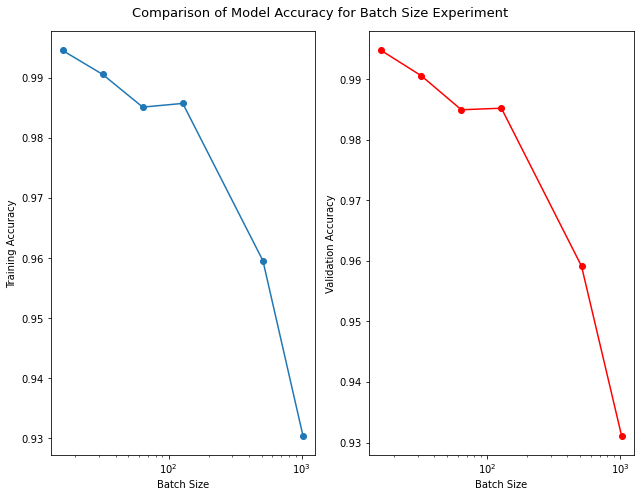

In [73]:
# The following is to accommodate for either type of post-processing CSV file
# The basic type, where the hyperparameter name is the index's name

if "batch_size" in df_BS.index.name:
    xData_BS = df_BS.index
else:
    # the x-axis data will be the batch size
    xData_BS = df_BS['batch_size']    

typeOfExperiment = "Batch Size"
# Initalize the subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
# plot the accuracy vs. batch size
axs[0].plot(xData_BS, df_BS['accuracy'], marker='o')
axs[0].set_xlabel(typeOfExperiment)
axs[0].set_ylabel("Training Accuracy")

# plot the validation accuracy vs. batch size
axs[1].plot(xData_BS, df_BS['val_accuracy'], marker='o', color='red')
axs[1].set_xlabel(typeOfExperiment)
axs[1].set_ylabel("Validation Accuracy")

# Log scale
for ax in axs:
    ax.set_xscale('log')

fig.suptitle("Comparison of Model Accuracy for " + typeOfExperiment + " Experiment", fontsize=13)

# add spaces on the graph
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2) # create space between the plots

plt.tight_layout()
plt.savefig("Post_Analysis_Batch_Size_Experiment.png")
plt.show()

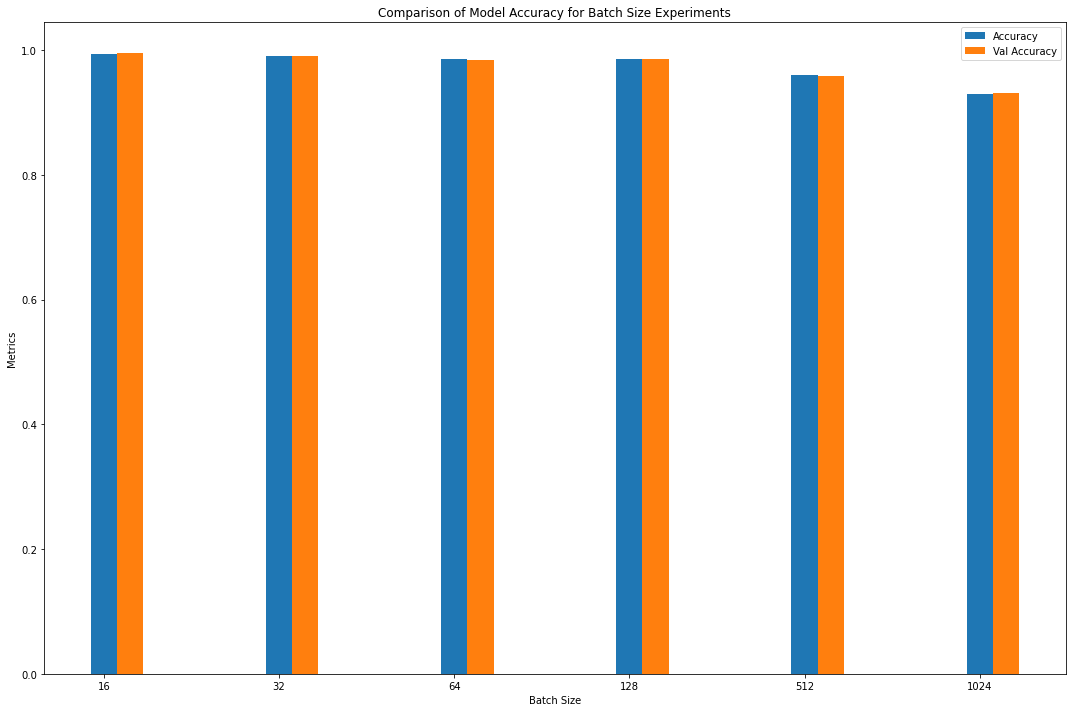

In [74]:
typeOfExperiment = "Batch Size"
# Set the width and height of the bar chart
bar_width = 0.15
bar_positions = range(len(df_BS))

# Initalize the subplots
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.bar(bar_positions, df_BS['accuracy'], width=bar_width, label='Accuracy')
ax1.bar([pos + bar_width for pos in bar_positions], df_BS['val_accuracy'], width=bar_width, label='Val Accuracy')

# Set x-axis ticks and labels
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(xData_BS)
# Add legend
ax1.legend()
# Set title and labels
ax1.set_title('Comparison of Model Accuracy for ' + typeOfExperiment + ' Experiments')
ax1.set_xlabel(typeOfExperiment)
ax1.set_ylabel('Metrics')

plt.tight_layout()
plt.savefig("Post_Analysis_Batch_Size_Experiment_Bar_Graph.png")

## Post Analysis: Batch Size Questions

1. What do you observe when the batch size changes?

#TODO

2.	How do you choose the right batch size?

#TODO

## Multiple Hidden Layer Post-Analysis

Recall the following about the number of multiple hidden layers:

 - Affects the complexity of the model


#### Step 1: Reading in the CSV File:

In [78]:
path = 'post_processing_hpc_layers.csv' # path to episode 7's post-processing CSV file 
# path = 'post_processing_hpc_lauers_ext.csv' # path to load_bulk_final_metrics CSV file from episode 7
# path = '../model_tuning/post_processing_layers.csv' # path to CSV file from episode 6

df_HL = pd.read_csv(path, index_col=0) # read in the csv file and ignore the additional numbered column

print(df_HL) # print this DataFrame

## Further analysis:
## You can also do things, such as sorting (by one of the result columns, such as loss)
print("\nSorted by val_accuracy:")
print(df_HL.sort_values(['val_accuracy'], ascending=False))

# This is redundant for the post-processing CSV file used in episode 7.
# However, if you utilize the more advanced CSV file creation, you need this.
# This groups the rows by the hidden neurons per layer value.
# Since this will be unique for each model, we can
# take the last value, which will be the last epoch.
df_HL =  df_HL.groupby('hidden_neurons').tail(1)

                      loss  accuracy  val_loss  val_accuracy
hidden_neurons                                              
[18]              0.043249  0.990277  0.043251      0.989911
[18, 18]          0.011239  0.997849  0.012328      0.997894
[18, 18, 18]      0.016116  0.996846  0.019097      0.997016
[18, 18, 18, 18]  0.018118  0.995839  0.020112      0.995130

Sorted by val_accuracy:
                      loss  accuracy  val_loss  val_accuracy
hidden_neurons                                              
[18, 18]          0.011239  0.997849  0.012328      0.997894
[18, 18, 18]      0.016116  0.996846  0.019097      0.997016
[18, 18, 18, 18]  0.018118  0.995839  0.020112      0.995130
[18]              0.043249  0.990277  0.043251      0.989911


#### Step 2: Creating the Visualizations:

First, we will create a subplot of a line graph, where the subplots are as follows (clock-wise):

 1) Training loss vs. number of hidden layers

 2) Training accuracy vs. number of hidden layers

 3) Validation loss vs. number of hidden layers

 4) Validation accuracy vs. number of hidden layers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


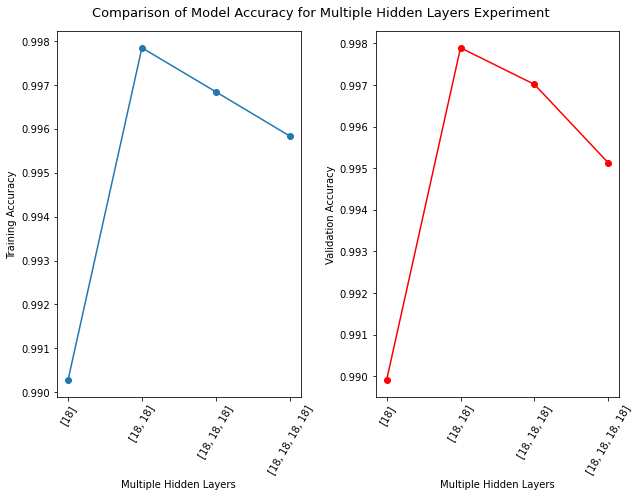

In [79]:
# The following is to accommodate for either type of post-processing CSV file
# The basic type, where the hyperparameter name is the index's name

if "neuron" in df_HL.index.name:
    xData_HL = df_HL.index
else:
    # if the hidden_neurons are input as a list
    if "[" in str(df_HL['hidden_neurons'][0]):
        # temporarily remove the "[]" and make it into an integer
        df_HL['hidden_neurons'] = df_HL['hidden_neurons'] \
        .str.replace('[^0-9]', '', regex=True).astype('int32')        
    # the x-axis data will be the hidden neurons
    xData_HL = df_HN['hidden_neurons']    
    
    
    
typeOfExperiment = "Multiple Hidden Layers"
# Initalize the subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
# plot the accuracy vs. number of neurons per layer
axs[0].plot(xData_HL, df_HL['accuracy'], marker='o')
axs[0].set_xlabel(typeOfExperiment)
axs[0].set_ylabel("Training Accuracy")

# plot the validation accuracy vs. number of neurons per layer
axs[1].plot(xData_HL, df_HL['val_accuracy'], marker='o', color='red')
axs[1].set_xlabel(typeOfExperiment)
axs[1].set_ylabel("Validation Accuracy")

fig.suptitle("Comparison of Model Accuracy for " + typeOfExperiment + " Experiment", fontsize=13)

# add spaces on the graph
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2) # create space between the plots

# Adjust the x-axis label to make it easier to read
for ax in axs:
    ax.set_xticklabels(xData_HL, rotation=60)
    
plt.tight_layout()
plt.savefig("Post_Analysis_Multiple_Hidden_Layers_Experiment.png")
plt.show()

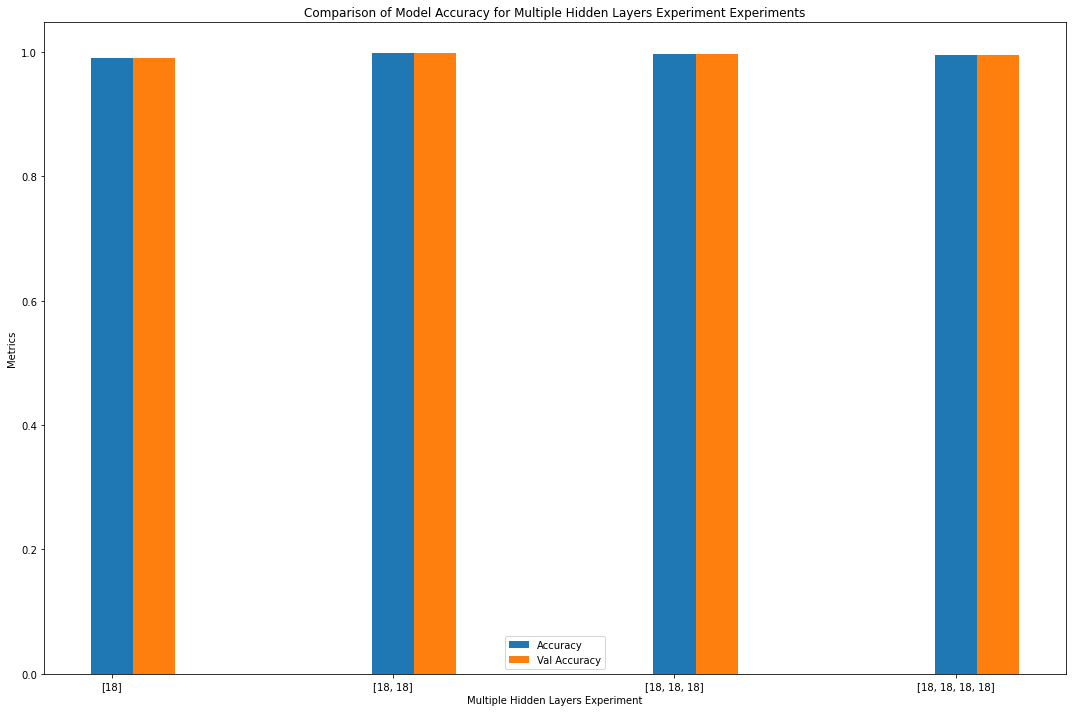

In [81]:
typeOfExperiment = "Multiple Hidden Layers Experiment"
# Set the width and height of the bar chart
bar_width = 0.15
bar_positions = range(len(df_HL))

# Initalize the subplots
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.bar(bar_positions, df_HL['accuracy'], width=bar_width, label='Accuracy')
ax1.bar([pos + bar_width for pos in bar_positions], df_HL['val_accuracy'], width=bar_width, label='Val Accuracy')

# Set x-axis ticks and labels
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(xData_HL)
# Add legend
ax1.legend()
# Set title and labels
ax1.set_title('Comparison of Model Accuracy for ' + typeOfExperiment + ' Experiments')
ax1.set_xlabel(typeOfExperiment)
ax1.set_ylabel('Metrics')

plt.tight_layout()
plt.savefig("Post_Analysis_Layers_Experiment_Bar_Graph.png")

## Post Analysis: Multiple Hidden Layer Questions

1. How many neurons should be in each hidden layer?

#TODO

2. What did you observe when comparing the accuracy of the models with the number of hidden layers?

#TODO

- The model with the least number of hidden layers, and thus the least complex, performs the worst.

- The model with four hidden layers performed 2nd to worst.

- This type of experiment requires one to think about the point of diminishing return.

- Does the increased accuracy of the model between one and three hidden layers outweigh the additional computational cost?


3. What conclusions can we make about the number of hidden layers and how it affects the accuracy?

#TODO

- Usually the more neurons, the more accurate (subject to risk of overfitting). 

- While increasing the number of hidden layers can potentially improve the model’s ability to learn complex patterns, it does not guarantee a higher accuracy!


## Summary

Hidden neurons: 

 - Increasing the number of hidden neurons increases the complexity of the model.
 
 - This increases the accuracy, until the point of diminishing return or until the accuracy decreases due to overfitting or practical limitations.


Learning rate:

- Smaller learning rates converge slower, since the change in parameters are smaller, requiring more epochs.

- Larger learning rates train faster but might overshoot the optimal answer.

- Very large learning rates will cause oscillations or instability. Typically small values are ideal 0.01 or even 0.001 are good. 


Batch size:

- Increasing the batch size decreases accuracy, but shortens training time.

- Decreasing it increases the accuracy but also increases the time.

- Consider the point of diminishing return.

Multiple hidden layers:

- Very problem dependent!

- Increasing the number of hidden layers increases the model’s complexity and thus capability to learn more complex problems.

- However, it does not guarantee higher accuracy, as demonstrated in this experiment by the model with four hidden layers not performing as well as one with two.

